# Tarea 3: Ciencia de Datos

Isaias Siliceo Guzmán
11/04/2024

In [1]:
# Packages

# Math
import numpy as np

# Data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px


# Models
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

# Metrics
import sklearn.metrics as metrics


PATH = '/home/chay/CDD/Tarea3_CDD/mnist/'

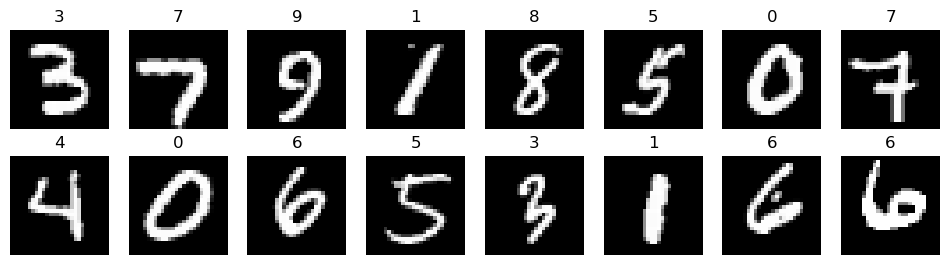

In [2]:
# Gráfico de números en MNIST
train_x = pd.read_csv(PATH+'mnist_Xtrain.csv',header=None).to_numpy()
train_y = pd.read_csv(PATH+'mnist_Ytrain.csv',header=None).to_numpy()

figure = plt.figure(figsize = (12,3))
cols, rows = 8, 2
for i in range(1, cols*rows + 1):
    sample_idx = np.random.choice(len(train_y),1)[0]
    img , label = train_x[sample_idx].reshape((28,28)), train_y.squeeze()[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray')


In [3]:
# Read the test data
test_x = pd.read_csv(PATH+'mnist_Xtest.csv',header=None).to_numpy()
test_y = pd.read_csv(PATH+'mnist_Ytest.csv',header=None).to_numpy()

## a) Baseline
Implementa el baseline que usaremos. Este será un método de regresión multivariada, es decir
$$
\begin{equation*}
\mathbf{Y=X\hat{B}}
\end{equation*}
$$
donde $\mathbf{Y}_{n\times |K|}$ es una matriz indicadora, donde cada renglón tiene ceros excepto en el lugar que corresponde al valor $y_k$, donde colocamos un $1$. Por ejemplo, si alguna imagen corresponde al dígito "3", el renglón correspondiente en $\mathbf{Y}$ será $(0,0,0,1,0,0,0,0,0,0)$.

$\mathbf{X}_{n\times784}$ es la matriz de características y $\mathbf{\hat{B}}$ es la matriz cuyas columnas contienen los $|K|$ coeficientes correspondientes $\hat{\beta}_k$.

Con esta formulación, asumimos un modelo lineal para cada respuesta $y_k$

$$
\begin{equation*}
\hat{y}_k = \mathbf{X\hat{\beta}_k},
\end{equation*}
$$

y la clasificación para alguna observación $\mathbf{x}$ se obtiene mediante

$$
\begin{equation*}
\hat{C}(\mathbf{x}) = \argmax_{k\in K} \hat{y}_k
\end{equation*}
$$

Utiliza las tuplas (x_train,y_train), (x_test,y_test) que usamos en clase para ajustar y probar el modelo, respectivamente. Puedes restringir el número de observaciones de cada conjunto , pero procura que el conjunto de entrenamiento sea más grande que el de prueba. Reporta las métricas de evaluación del clasificador. 

In [4]:
n = len(train_x)
# Construimos la matriz indicadora
Y_train = np.array([
    np.insert(np.zeros(9),train_y[i],1) for i in range(n)
])

# Ajustamos una regresión lineal multivariada a los datos de entrenamiento
reg = LinearRegression().fit(train_x, Y_train)

# Hacemos la predicción
m = len(test_x)
y_predict = reg.predict(test_x)
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = np.argmax(y_predict[i])

# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.83      0.98      0.90      1135
           2       0.92      0.79      0.85      1032
           3       0.85      0.87      0.86      1010
           4       0.81      0.90      0.85       982
           5       0.88      0.74      0.80       892
           6       0.88      0.91      0.90       958
           7       0.85      0.86      0.86      1028
           8       0.84      0.78      0.81       974
           9       0.84      0.79      0.82      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## b) LDA

In [5]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver='svd').fit(train_x,np.reshape(train_y,60000,))

# Hacemos la predicción
y_predict_lda = lda.predict(test_x)


# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(test_y, y_predict_lda))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.89      0.97      0.93      1135
           2       0.92      0.79      0.85      1032
           3       0.87      0.87      0.87      1010
           4       0.84      0.90      0.87       982
           5       0.84      0.82      0.83       892
           6       0.91      0.89      0.90       958
           7       0.91      0.84      0.88      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.85      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## QDA

In [6]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis().fit(train_x,np.reshape(train_y,60000,))

# Hacemos la predicción
y_predict_qda = qda.predict(test_x)

# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(test_y, y_predict_qda))

/home/chay/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.34      0.97      0.51       980
           1       0.90      0.95      0.92      1135
           2       0.90      0.17      0.29      1032
           3       0.62      0.27      0.38      1010
           4       0.90      0.13      0.22       982
           5       0.84      0.09      0.16       892
           6       0.68      0.96      0.80       958
           7       0.92      0.28      0.43      1028
           8       0.49      0.63      0.55       974
           9       0.42      0.95      0.58      1009

    accuracy                           0.55     10000
   macro avg       0.70      0.54      0.48     10000
weighted avg       0.70      0.55      0.49     10000



## PCA

In [7]:
# Standarize data
scaler = StandardScaler()
Xdat_z = scaler.fit_transform(train_x)

In [8]:
# Se utilizan 256 componentes
n_components = 256
numbers_pca = PCA(n_components)
numbers_proj = numbers_pca.fit_transform(Xdat_z)

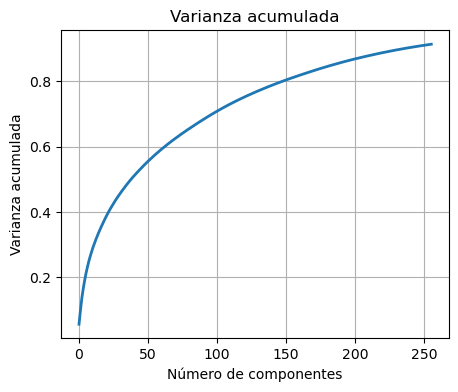

In [9]:
## varianza explicada
plt.figure(figsize=(5, 4))
plt.plot(np.cumsum(numbers_pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('Número de componentes'), plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada')
#plt.savefig(PATH+'P4_b.png',bbox_inches='tight')
plt.show()

In [10]:
numbers_proj.shape

(60000, 256)

Para evitar un sesgo al unir los datos de prueba con los de entrenamiento. Mejor dividimos los 60000 de entrenamiento en un nuevo conjunto de entrenamiento y prueba.

In [18]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(numbers_proj[:,:100],train_y)

In [19]:
ypca_train.shape

(45000, 1)

In [20]:
# Linear Discriminant Analysis
lda_pca = LinearDiscriminantAnalysis(solver='svd').fit(xpca_train,np.reshape(ypca_train,45000,))

# Hacemos la predicción
ypca_pred_lda = lda_pca.predict(xpca_test)


# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(ypca_test, ypca_pred_lda))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1532
           1       0.82      0.97      0.89      1683
           2       0.92      0.80      0.86      1537
           3       0.86      0.85      0.86      1522
           4       0.87      0.89      0.88      1459
           5       0.85      0.81      0.83      1363
           6       0.92      0.90      0.91      1455
           7       0.92      0.84      0.88      1559
           8       0.79      0.78      0.79      1432
           9       0.79      0.87      0.83      1458

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [21]:
# Quadratic Discriminant Analysis
qda_pca = QuadraticDiscriminantAnalysis().fit(xpca_train,np.reshape(ypca_train,45000,))

# Hacemos la predicción
ypca_pred_qda = qda_pca.predict(xpca_test)

# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(ypca_test, ypca_pred_qda))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1532
           1       0.99      0.95      0.97      1683
           2       0.89      0.79      0.84      1537
           3       0.85      0.67      0.75      1522
           4       0.95      0.78      0.86      1459
           5       0.94      0.63      0.76      1363
           6       0.95      0.94      0.95      1455
           7       0.93      0.57      0.70      1559
           8       0.52      0.92      0.66      1432
           9       0.60      0.93      0.73      1458

    accuracy                           0.81     15000
   macro avg       0.86      0.81      0.82     15000
weighted avg       0.86      0.81      0.82     15000



## Factor Analysis

In [36]:
from sklearn.decomposition import FactorAnalysis

In [37]:
# Se utilizan 64 componentes
numbers_FA = FactorAnalysis(n_components=64, random_state=0)
numbers_FA = numbers_FA.fit_transform(Xdat_z)

In [38]:
numbers_FA.shape

(60000, 64)

In [39]:
xfa_train, xfa_test, yfa_train, yfa_test = train_test_split(numbers_FA,train_y)

In [40]:
# Linear Discriminant Analysis
lda_FA = LinearDiscriminantAnalysis(solver='svd').fit(xfa_train,np.reshape(yfa_train,45000,))

# Hacemos la predicción
yFA_pred_lda = lda_FA.predict(xfa_test)


# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(yfa_test, yFA_pred_lda))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1447
           1       0.84      0.96      0.90      1652
           2       0.91      0.81      0.86      1515
           3       0.86      0.83      0.84      1551
           4       0.86      0.88      0.87      1396
           5       0.83      0.82      0.82      1390
           6       0.92      0.92      0.92      1473
           7       0.91      0.85      0.88      1558
           8       0.81      0.78      0.80      1459
           9       0.80      0.88      0.84      1559

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [41]:
# Quadratic Discriminant Analysis
qda_fa = QuadraticDiscriminantAnalysis().fit(xfa_train,np.reshape(yfa_train,45000,))

# Hacemos la predicción
yfa_pred_qda = qda_fa.predict(xfa_test)

# Imprimimos las métricas para evaluar la clasificación
print(metrics.classification_report(yfa_test, yfa_pred_qda))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1447
           1       0.98      0.95      0.97      1652
           2       0.90      0.96      0.93      1515
           3       0.94      0.92      0.93      1551
           4       0.96      0.93      0.95      1396
           5       0.96      0.94      0.95      1390
           6       0.98      0.96      0.97      1473
           7       0.96      0.92      0.94      1558
           8       0.86      0.93      0.89      1459
           9       0.90      0.93      0.91      1559

    accuracy                           0.94     15000
   macro avg       0.94      0.94      0.94     15000
weighted avg       0.94      0.94      0.94     15000



In [46]:
qda_fa.predict(xfa_test[0].reshape(-1, 64))

array([3])

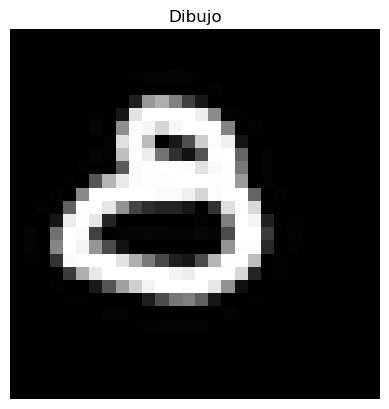


Predicción con QDA: 1
Predicción con LDA: 1


In [13]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageTk, ImageDraw  # Add ImageDraw import




def draw_and_predict():
    # Función para los movimientos
    def motion(event):
        x, y = event.x, event.y
        x = max(min(x, width - 1), 0)
        y = max(min(y, height - 1), 0)
        canvas.create_oval(x - radius, y - radius, x + radius, y + radius, fill='white')

    # Función para crear el canvas en una matriz
    def canvas_to_matrix():
        image = Image.new('RGB', (width, height), 'black')
        draw = ImageDraw.Draw(image)
        for obj in canvas.find_all():
            coords = canvas.coords(obj)
            draw.ellipse(coords, fill='white')
        
        # Convertimos a una imagen de 8x8
        resized_image = image.resize((28, 28), Image.LANCZOS)
        #Convert the resized image to a grayscale array
        grayscale_array = resized_image.convert('L')
        return np.array(grayscale_array)

    def plot_gray_image(matrix):
        plt.imshow(matrix, cmap='gray')
        plt.title('Dibujo')
        plt.axis('off')
        plt.show()

    def predict_faqda(draw_num):
        # Standarize data
        scaler = StandardScaler()
        Xdat_z = scaler.fit_transform(draw_num)
        plot_gray_image(draw_num)
        #print(Xdat_z)
        # Se hace la predicción con el modelo ya entrenado
        yfa_pred_qda = qda_fa.predict(Xdat_z.flatten().reshape(-1,64))
        # Hacemos la predicción
        yFA_pred_lda = lda_FA.predict(Xdat_z.flatten().reshape(-1,64))
        return print('Factor Analysis:\nPredicción con QDA: %d\nPredicción con LDA: %d'%(yfa_pred_qda,yFA_pred_lda))
    
    def predict_qda(draw_num):
        # Standarize data
        scaler = StandardScaler()
        Xdat_z = scaler.fit_transform(draw_num)
        plot_gray_image(draw_num)
        #print(Xdat_z)
        # Se hace la predicción con el modelo ya entrenado
        y_pred_qda = qda.predict(Xdat_z.flatten().reshape(-1,784))
        # Hacemos la predicción
        y_pred_lda = lda.predict(Xdat_z.flatten().reshape(-1,784))
        return print('\nPredicción con QDA: %d\nPredicción con LDA: %d'%(y_pred_qda,y_pred_lda))

    # Se crea una Tkinter window
    root = tk.Tk()
    root.title('Dibuja un número')

    # Las dimensiones del canvas
    width = 280
    height = 280
    radius = 12

    # Create canvas
    canvas = tk.Canvas(root, width=width, height=height, bg='black')
    canvas.pack()

    # Para asegurar el mouse al canvas
    canvas.bind('<B1-Motion>', motion)

    # Botón para hacer la predicción
    button = tk.Button(root, text='¡Adivina mi número!', command=lambda: predict_qda(canvas_to_matrix()))
    button.pack()

    # Run Tkinter event loop
    root.mainloop()

_
# Test the function
draw_and_predict()


# 2)

## 0) Librerías y módulos

In [6]:
import csv
from pathlib import Path
import sys
import os
import glob
import pandas as pd
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

path_root = Path('/home/chay/CDD/my_functions.py').parents[0]
sys.path.append(str(path_root))
print(sys.path)

from my_functions import *

['/home/chay/CDD/Tarea3_CDD', '/home/chay/anaconda3/lib/python311.zip', '/home/chay/anaconda3/lib/python3.11', '/home/chay/anaconda3/lib/python3.11/lib-dynload', '', '/home/chay/anaconda3/lib/python3.11/site-packages', '/home/chay/CDD']


[nltk_data] Downloading package punkt to /home/chay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/chay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1) Identificar los archivos que terminan en 'OR.csv'

In [2]:
# Directorio donde se encuentran las conferencias.
dir_data = '/home/chay/CDD/conferencias_matutinas_amlo-master/'

# Tenemos interés en 
years = ['2019/', '2020/', '2021/', '2022/', '2023/']

# Se almacenan los paths de cada archivo
file_paths = []
extension = 'OR.csv'

# Se itera sobre los años de interés
for year in years:
    # Se concatenan los 
    year_folder = os.path.join(dir_data, year)
    
    # Verificamos si el archivo existe
    if os.path.exists(year_folder):
        # Recursive search for files ending with 'Ob.csv' in the year folder
        file_paths.extend(glob.glob(os.path.join(dir_data, '**', f'*{extension}'), recursive=True))

# Creamos el dataFrame
mananeras = pd.DataFrame({'path': file_paths})

## 2) Abrir cada archivo para extraer la segunda columna y su fecha

In [3]:
# Función para extraer la columna 2 en raw y la date
def extract_col(f):

    with open(f, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        # Extraemos día mes y año
        first = next(reader)
        date  = first[6]+'-'+first[5]+'-'+first[4]
        # Extraemos la segunda columna
        first_row = [first[1]]
        second_column = [row[1] for row in reader]
        column = first_row + second_column 
        # Unimos todas las frases en una sola
        s = ' ' #Las unimos por un espacio
        s = s.join(column)
    
    return s, date

In [4]:
# Agregamos la columna 'raw' que contiene todas las palabras 
# del presidente en la mañanera de un día en paçrticular
# Agregamos además la columna date para saber qué día lo dijo
mananeras['raw'], mananeras['date'] = zip(*mananeras['path'].apply(extract_col))

In [5]:
# Convertimos la columna date a formato 'YYYY-MM-DD'
mananeras['date'] = pd.to_datetime(mananeras['date'], format='%Y-%m-%d')

## En este punto no importa si entraron datos antes de 2019 porque podemos filtrar
## la tabla después por la fecha.

# Seleccionamos los años que correspondan al intervalo de tiempo deseado.
# 2019-01-01 -> 2023-12-31
mananeras_4a = mananeras[(mananeras['date'] <= '2023-12-31') & (mananeras['date'] >= '2019-01-01')]

In [6]:
# Tomamos la fecha como índice
mananeras_4a.set_index('date', inplace=True)

In [7]:
mananeras_4a.head()

,path,raw
date,,
2023-07-25,/home/chay/CDD/conferencias_matutinas_amlo-mas...,"Muy buenos días. Ánimo. Bueno, vamos a inform..."
2023-07-19,/home/chay/CDD/conferencias_matutinas_amlo-mas...,"Buenos días. Ánimo. Hoy es miércoles, es un d..."
2023-07-13,/home/chay/CDD/conferencias_matutinas_amlo-mas...,"Buenos días. Ánimo, ánimo. Bueno, el día de h..."
2023-07-26,/home/chay/CDD/conferencias_matutinas_amlo-mas...,"Buenos días. Ánimo. Tarde, pero seguro. Vamos..."
2023-07-04,/home/chay/CDD/conferencias_matutinas_amlo-mas...,"Buenos días. Ánimo, Bueno, pues hoy es martes..."


## 3) Agrupar los datos por semana en un nuevo data frame


In [8]:
# Ahora sólo vamos a conservar los datos de la columna raw
mananeras_weekly = mananeras_4a.resample('W-SUN')['raw'].apply(' '.join)

In [9]:
mananeras_weekly

date
2019-01-06    : Buenos días. Primero, reiterar nuestra manif...
2019-01-13    : Buenos días. Estamos terminando el periodo c...
2019-01-20    : Buenos días. El día de hoy vamos a informar ...
2019-01-27    : Buenos días. Vamos a informar sobre el plan ...
2019-02-03    : Buenos días. Vamos a informar y al mismo tie...
                                    ...                        
2023-12-03     Buenos días-tarde-noches. Ánimo. Bueno, pues ...
2023-12-10     Buenos días. ¿Cómo están? Ánimo, ánimo. Vamos...
2023-12-17     Buenos días. Ánimo, ánimo. Ya empezó el frío ...
2023-12-24     Buenos, días. Ánimo. Vamos a informar sobre ‘...
2023-12-31     Buenos días. Ánimo, ya va a pasar la gripa. ¿...
Freq: W-SUN, Name: raw, Length: 261, dtype: object

## 4) Preprocesar el texto

In [10]:
# Definimos el preprocesador con la clase apropiada
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, 
                                _remueveStop=True, _stemming=False)


In [11]:
mananeras_weekly_preprocessed = mananeras_weekly.apply(preprocesador.preprocesa)

In [12]:
mananeras_weekly_preprocessed

date
2019-01-06    buenos dias primero reiterar manifestacion des...
2019-01-13    buenos dias terminando periodo conocido guadal...
2019-01-20    buenos dias dia hoy vamos informar plan combat...
2019-01-27    buenos dias vamos informar plan general combat...
2019-02-03    buenos dias vamos informar mismo tiempo contes...
                                    ...                        
2023-12-03    buenos diastardenoches animo bueno pues vamos ...
2023-12-10    buenos dias como animo animo vamos lunes infor...
2023-12-17    buenos dias animo animo empezo frio lluvia bue...
2023-12-24    buenos dias animo vamos informar quien quien p...
2023-12-31    buenos dias animo va pasar gripa como va gripa...
Freq: W-SUN, Name: raw, Length: 261, dtype: object

In [13]:
# GUARDAR A UN CSV Y REINICIAR KERNEL PARA LIBERAR MEMORIA
mananeras_weekly_preprocessed.to_csv('/home/chay/CDD/Tarea3_CDD/mananeras_weekly_preprocessed.csv', index=True)


# 5) Elegir los tópicos más destacables

In [2]:
mananeras_weekly_preprocessed = pd.read_csv('/home/chay/CDD/Tarea3_CDD/mananeras_weekly_preprocessed.csv',index_col='date',header='infer')

In [3]:
mananeras_weekly_preprocessed['raw'][108] = ' '
mananeras_weekly_preprocessed['raw'][109] = ' '

### a) Primero verificamos las palabras mas comunes entre el texto

In [16]:
# Unimos todas las mananeras en un solo texto
texto_mananeras = ' '.join(mananeras_weekly_preprocessed['raw'])

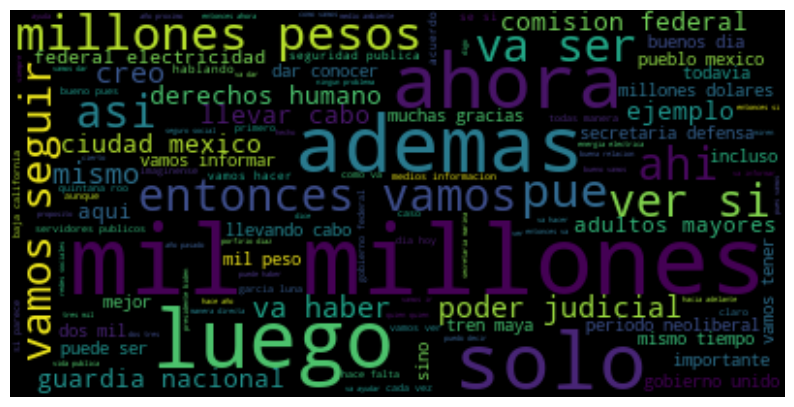

In [19]:
wordcloud = WordCloud(max_font_size=50).generate(texto_mananeras)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### b) Hay que remover palabras que no aportan nada

In [4]:

# Funcion para remover palabras especificas de la serie de pandas
def remove_specific_words(text):
    # Define the words to remove
    words_to_remove = ['va', 'ser','ahi','mil','luego','solo','ver','si','pesos',
                   'aqui','pue','ademas','millones','mismo','vamos','llevar','cabo',
                   'llevando cabo','haber','importante','todavia','ahora','puede ser',
                   'muchas gracias','asi','creo','mejor','mismo tiempo','buenos dia',
                   'dos mil','ejemplo','seguir','pesos','ser','hablando','buenos dia',
                   'caso','hablando','dia hoy','hace falta','incluso','muchas gracias',
                   'bueno pues','haciendo','imaginense','tiempo','pues','dar conocer',
                   'puedo decir','sino','hecho','acuerdo','dice','digo','claro','miren',
                   'buenos dia','muchas  gracias', 'dar conocer','bueno','aunque',
                   'todas manera','hace falta','primero','cierto','siempre','dar  conocer',
                   'muchas  gracias','decir','todas manera','todas','manera','ah',
                   'año proximo','hoy','dia','cosa','dicho','puedo decir','puedo','decir',
                   'ayuda','cada vez','muchas','gracias','mucha','gracia','buenos','dias',
                   'dar','conocer','dar conocer','hace','año','dos','tres','cuanto','cada',
                   'vez','cada vez','proximo','entonces','falta','para','casos','adelante',
                   'hacia','puede','viendo','quien','pasa','se','alla','pai','ayer','proposito'
                   ,'asunto','veces','dije','parte','cosas','verdad','bien','llama','como',
                   'repito','fin','semana','saben','hablo','menos','tranquilidad','despues',
                   'trabajando','hablado','ningun','problema','minimo','paso','bien','señor',
                   'igual','despues','efecto','decia','pendiente','porfirio','diaz','queremos',
                   'dicen','cambio','toda','buena','vida','pais','van','tener','diferencia',
                   'ayudar','sabe','persona','voy','pedir','habla','preguntas','respuesta',
                   'da','gusto','hablado','viene','ustedes','modo','pueblo pueblo','lado','general',
                   'hacer','hacen','debe','llego','pueblo  pueblo','quiero','hablar','pueden','años','ir',
                   'mañana','unidos','apoyo','ciento','informar','presidente','publica',
                   'secretaria','secretario','tema','nadie','nunca','plan','ciudad','arriba',
                   'hicieron','hizo','iba','mal','nuevo','podemos','cinco','cuatro','cuenta','gran',
                   'mayoria','proceso','quieren','atender','buscar','compromiso','donde','elementos',
                   'favor','llegar','mayor','medio','reunion','seis','situacion','tan','buen',
                   'corresponde','decision','entregar','forma','garantizar','grandes','ninguna',
                   'nueva','pasado','sector','tiempos','contratos','dejar','dio','existe','fondo',
                   'grupo','poner','primera','resolver','vemos','abajo','afortunadamente','ayudando',
                   'baja','cargo','casi','confianza','cualquier','cuantos','dijo','especial','iban',
                   'intereses','lunes','muchisimo','momento','ojala','pagar','parece','pregunta',
                   'principal','primer','problemas','pueda','quiere','segundo','terminar',
                   'acerca','actuar','atendiendo','director','juarez','lleva','llevando','nivel',
                   'ocho','partir','pensando','permitir','salinas','calderon','salir','sido',
                   'siquiera','vaya','aun','dando','enfrentar','grupos','hacemos','llega','mes','meses',
                   'puedan','significa','sigue','buscando','fuerza','mantener','posibilidad','pronto',
                   'casa','temas','tomar','zona']
    
    # Split the text into words
    words = text.split()
    
    # Remove specific words
    filtered_words = [word for word in words if word.lower() not in words_to_remove]
    
    # Join the filtered words back into a single text
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

# Aplicamos la función para eliminar las palabras en cada registro 
mananeras_filtradas = mananeras_weekly_preprocessed['raw'].apply(remove_specific_words)

mananeras_filtradas

date
2019-01-06    reiterar manifestacion deseo pienso optimista ...
2019-01-13    terminando periodo conocido guadalupereyes con...
2019-01-20    combatir robo combustible quedamos ibamos bala...
2019-01-27    combate robo combustibles acciones informarles...
2019-02-03    contestar iniciaremos informe combate robo com...
                                    ...                        
2023-12-03    diastardenoches animo ainiciarla precios docto...
2023-12-10    animo animo precios avance tren maya correspon...
2023-12-17    animo animo empezo frio lluvia precios avance ...
2023-12-24    animo precios noticia inauguracion presa santa...
2023-12-31    animo pasar gripa gripa pasando pasando tempor...
Name: raw, Length: 261, dtype: object

### c) Verificamos otra vez si hay buenos topicos

In [21]:
# Unimos todas las mananeras en un solo texto
texto_mananeras = ' '.join(mananeras_filtradas)

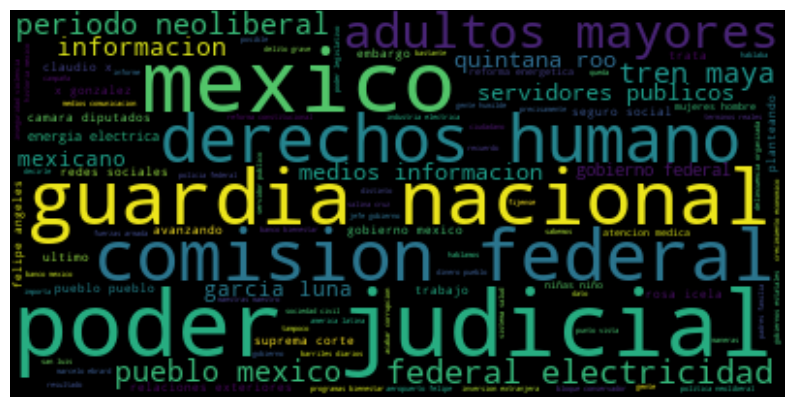

In [22]:
wordcloud = WordCloud(max_font_size=50).generate(texto_mananeras)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## a) Obtener una representación TF-IDF

In [7]:
# Elegimos un tamaño de vocabulario de 150 para explorar de forma
# aceptable una cantidad de palabras representativa de cada tópico.
# Se limpiaron muchas palabras para que las 150 fueran 'categorizables'
max_words = 100
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=max_words)
X = vectorizer.fit_transform(mananeras_filtradas)
tf_idf = X.toarray()
tf_idf_df = pd.DataFrame(tf_idf,columns=vectorizer.get_feature_names_out())
tf_idf_df

,adultos,aeropuerto,agua,atencion,autoridades,avanzando,bienestar,campaña,ciudadanos,comision,...,seguro,servicio,sistema,social,trabajadores,trabajo,transformacion,trata,tren,violencia
0,0.014311,0.000000,0.000000,0.051820,0.053428,0.026309,0.012906,0.013154,0.180679,0.000000,...,0.051035,0.012856,0.130046,0.051230,0.025615,0.243342,0.012807,0.039014,0.014147,0.156055
1,0.050559,0.024515,0.000000,0.015256,0.047187,0.069707,0.053191,0.015491,0.250760,0.000000,...,0.037561,0.007570,0.229711,0.007541,0.037705,0.120656,0.015082,0.022971,0.000000,0.015314
2,0.046820,0.015134,0.000000,0.000000,0.014566,0.078896,0.084441,0.021517,0.133698,0.057819,...,0.041740,0.049070,0.092179,0.027933,0.062849,0.111732,0.013966,0.042544,0.000000,0.021272
3,0.055705,0.006752,0.000000,0.037819,0.032494,0.038401,0.163258,0.000000,0.075350,0.064493,...,0.018623,0.037531,0.145528,0.056083,0.074777,0.099702,0.006231,0.025309,0.027533,0.088582
4,0.095735,0.066313,0.006631,0.030950,0.012764,0.050283,0.117164,0.018856,0.067832,0.025334,...,0.042674,0.024572,0.043496,0.097914,0.104033,0.128512,0.024478,0.006214,0.033799,0.093207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.027503,0.111126,0.062231,0.033195,0.064171,0.088477,0.057869,0.037919,0.037202,0.004246,...,0.028605,0.061766,0.037487,0.053327,0.057429,0.131266,0.077939,0.037487,0.212966,0.033322
257,0.050829,0.028166,0.091540,0.105169,0.027108,0.120136,0.052384,0.013348,0.045836,0.000000,...,0.045314,0.045661,0.059384,0.090975,0.155957,0.155957,0.038989,0.039589,0.086136,0.026393
258,0.000000,0.033948,0.064501,0.079223,0.042474,0.070789,0.072607,0.012871,0.044196,0.032424,...,0.015604,0.110069,0.050897,0.065789,0.090852,0.147243,0.034461,0.015905,0.422189,0.050897
259,0.008573,0.000000,0.108079,0.023282,0.032006,0.086681,0.069579,0.039400,0.030924,0.103227,...,0.053501,0.061613,0.007790,0.053706,0.038361,0.107411,0.046033,0.046742,0.118648,0.046742


In [25]:
# Analizamos el resultado de las primeras 100 palabras
# En caso de haber palabras que no puedan ser categorizadas las removemos
# en el filtraje de arriba.
tf_idf_df.columns[:100]

Index(['adultos', 'aeropuerto', 'agua', 'atencion', 'autoridades', 'avanzando',
       'bienestar', 'campaña', 'ciudadanos', 'comision', 'comunicacion',
       'conservadores', 'constitucion', 'construccion', 'corrupcion',
       'defensa', 'democracia', 'derecho', 'derechos', 'desarrollo', 'dinero',
       'dolares', 'economia', 'educacion', 'electrica', 'electricidad',
       'empresa', 'empresas', 'energia', 'federal', 'fiscalia', 'gas', 'gente',
       'gobernador', 'gobierno', 'gobiernos', 'guardia', 'hacienda',
       'historia', 'hospitales', 'humanos', 'impuestos', 'informacion',
       'informe', 'inversion', 'investigacion', 'jovenes', 'judicial',
       'justicia', 'ley', 'libertad', 'maestros', 'marina', 'maya', 'mayores',
       'medicos', 'medios', 'mexicanos', 'mexico', 'mujeres', 'mundo',
       'nacional', 'neoliberal', 'obras', 'paises', 'pandemia', 'partido',
       'paz', 'pemex', 'periodo', 'personas', 'petroleo', 'pobres', 'poder',
       'politica', 'precio', 'pr

## b) Descomposición SVD
Los tópicos sugeridos basándome en los nombres de las columnas de la representación TF-IDF:
- Seguridad y Violencia
- Sector privado
- Desarrollo
- Economía
- Salud


De modo que $k=5$ tópicos

In [26]:
from sklearn.decomposition import TruncatedSVD

In [27]:
svd = TruncatedSVD(n_components=5, n_iter=4, random_state=42)
svd.fit(tf_idf_df)

TruncatedSVD(n_components=5, n_iter=4, random_state=42)

Cada nombre de la columna de V es una palabra. El peso máximo en esa columna será la categoría a la que perteneces. Vamos a extraer que palabras pertenecen a qué categoría de las 8 determinadas con SVD y veremos si coinciden con las que propuse.

In [28]:
# Función para extraer las palabras y a qué categoría pertenecen.
def extract_words_from_V(Vmtx,col_names):
    k, m_words = Vmtx.shape
    # obtenemos las categorias.
    categories = [np.argmax(Vmtx[:,i]) for i in range(m_words)]
    
    # Concatenamos las listas col_names y su respectiva categoría
    # [['palabra',categoria],['string',int]...]
    word_cat = [list(pair) for pair in zip(col_names, categories)]

    df = pd.DataFrame(word_cat, columns=['Palabra', 'Topico'])

    return df

Topicos = extract_words_from_V(svd.components_,tf_idf_df.columns)

Topicos.head()

,Palabra,Topico
0,adultos,2
1,aeropuerto,4
2,agua,3
3,atencion,2
4,autoridades,0


### Word clouds de las categorias

In [29]:
# Hacemos una columna de la frecuencia con la que ocurre cada palabra en las mañaneras
Topicos['Frecuencia'] = Topicos['Palabra'].apply(texto_mananeras.split().count)

In [30]:
# En este dataframe ahora tenemos la palabra, a qué Topico pertenece y su frecuencia en el texto
Topicos.head(10)

,Palabra,Topico,Frecuencia
0,adultos,2,7955
1,aeropuerto,4,12605
2,agua,3,14020
3,atencion,2,10395
4,autoridades,0,8145
5,avanzando,0,10210
6,bienestar,0,13875
7,campaña,0,8920
8,ciudadanos,1,10805
9,comision,3,11700


In [31]:
# Path para guardar las imagenes
save_path = '/home/chay/CDD/Tarea3_CDD/word_clouds/'

# Función para generar los wordclouds basado en la frecuencia con la que aparecen en el
# texto original
def makeImage(df):
    word_freq_dict = dict(zip(df['Palabra'], df['Frecuencia']))
    wc = WordCloud(background_color="white",max_font_size=40)
    # generate word cloud
    wc.generate_from_frequencies(word_freq_dict)

    # show
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.show()
    # Guardamos la figura en el path especifico
    filename = os.path.join(save_path, f'topic_{topic_label}wc.png')
    plt.savefig(filename,bbox_inches='tight')
    plt.close()  # Close the figure to release memory
    print(f"Figure for topic {topic_label} saved as {filename}")


In [32]:
# Iteramos sobre los topicos
for topic_label in range(5):
    # Llamada a la función de impresión de imagenes
    makeImage(Topicos[Topicos['Topico'] == topic_label])


Figure for topic 0 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_0wc.png
Figure for topic 1 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_1wc.png
Figure for topic 2 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_2wc.png
Figure for topic 3 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_3wc.png
Figure for topic 4 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_4wc.png


## c) Transformacion XV

In [33]:
# La matriz documento-topico
doc_topic = svd.transform(tf_idf_df)

In [34]:
# En cada mañanera hay un tópico, el cual está dado por el mayor peso en la
# las columnas de esta matriz
doc_topic.shape

(261, 5)

In [35]:
# Función para obtener el tema de cada mañanera en función del
# peso en cada renglón de la matriz doc_topic
temas_mananera = [ np.argmax(doc_topic[i,:]) for i in range(len(doc_topic))]

Todas las categorías se van a cero porque la matriz documento-topico se
pesa mucho en la primera columna.

In [36]:
doc_topic

array([[ 0.69254624,  0.28979057, -0.2858186 , -0.20322081, -0.1836827 ],
       [ 0.80387698,  0.18658326, -0.13066661, -0.11878011,  0.03611247],
       [ 0.84396781,  0.20249945, -0.03316065, -0.00115752, -0.07042239],
       ...,
       [ 0.8037512 , -0.06889383, -0.19203108, -0.07539771,  0.14329208],
       [ 0.91164773, -0.00319279, -0.076694  ,  0.06986716,  0.05881774],
       [ 0.91548358, -0.07191719, -0.02420463, -0.06340837,  0.15803131]])

In [37]:
# Visualización con PCA con la doc_topic
from sklearn.decomposition import PCA
pca_svd = PCA(n_components=2)
projections_PCA = pca_svd.fit_transform(doc_topic)
print(pca_svd.explained_variance_ratio_)

[0.33118872 0.20994708]


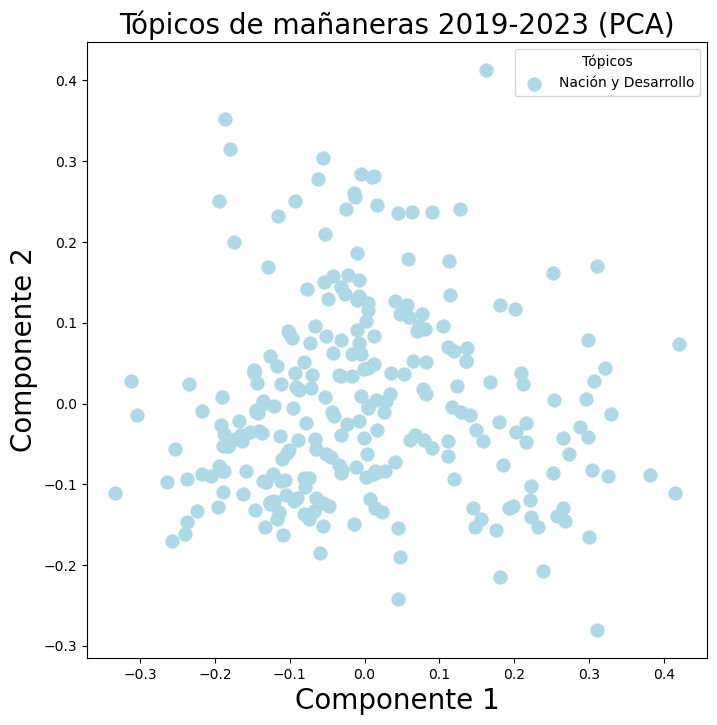

In [40]:
# Visualización con PCA con la doc_topic
PC1 = projections_PCA[:,0]
PC2 = projections_PCA[:,1]
#group = Topicos['Topico']
group = temas_mananera
target_names = ['Nación y Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado','Relaciones Exteriores']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (PCA)', size=20)
plt.savefig(PATH+'PCA-xv.png',bbox_inches='tight')
plt.show()

In [39]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(doc_topic)
X_transformed.shape

(261, 2)

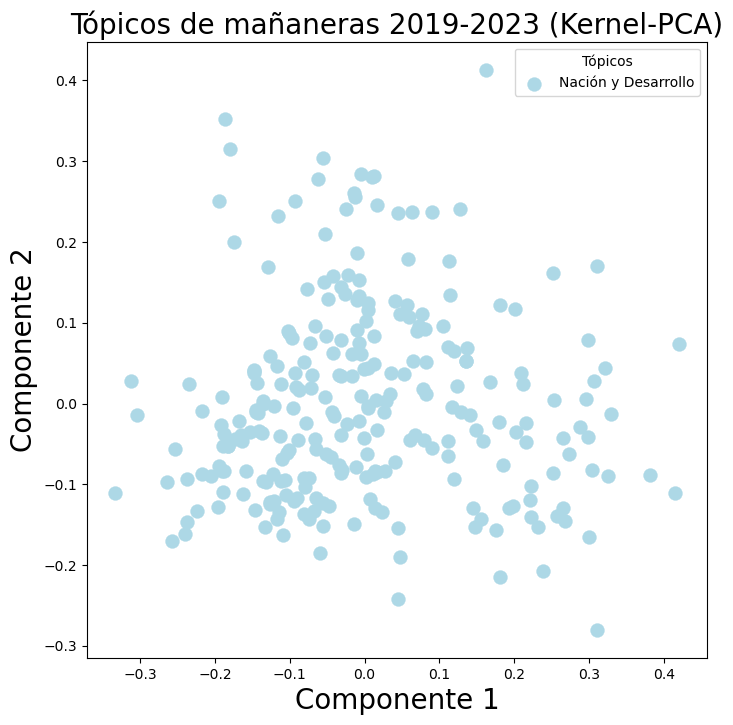

In [41]:
# Visualización con Kernel- PCA con la doc_topic
PC1 = X_transformed[:,0]
PC2 = X_transformed[:,1]
#group = Topicos['Topico']
group = temas_mananera
target_names = ['Nación y Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado','Relaciones Exteriores']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (Kernel-PCA)', size=20)
plt.savefig(PATH+'KernelPCA_xv.png',bbox_inches='tight')
plt.show()

In [42]:
# Visualización t-SNE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(doc_topic)
X_embedded.shape

(261, 2)

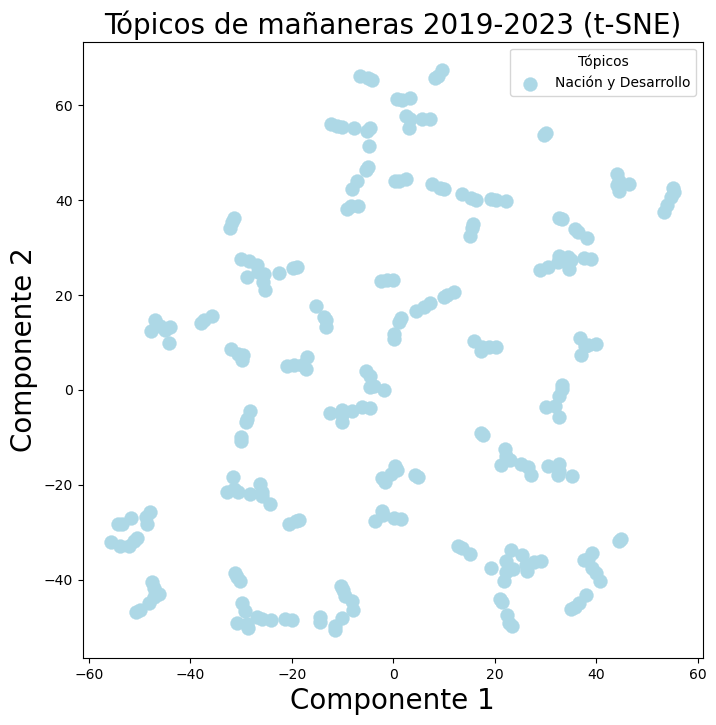

In [44]:
# Visualización con t-SNE con la doc_topic
PC1 = X_embedded[:,0]
PC2 = X_embedded[:,1]
#group = Topicos['Topico']
group = temas_mananera
target_names = ['Nación y Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado','Relaciones Exteriores']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (t-SNE)', size=20)
plt.savefig(PATH+'tSNE-xv.png',bbox_inches='tight')
plt.show()

## d) Descomposición NMF

In [8]:
from sklearn.decomposition import NMF

In [9]:
# Aplicamos
model = NMF(n_components=5, init='random', random_state=0,max_iter=1000)
W = model.fit_transform(tf_idf_df)
H = model.components_

In [10]:
# Función para extraer las palabras y a qué categoría pertenecen.
def extract_words_from_H(Hmtx,col_names):
    k, m_words = Hmtx.shape
    # obtenemos las categorias.
    categories = [np.argmax(Hmtx[:,i]) for i in range(m_words)]
    
    # Concatenamos las listas col_names y su respectiva categoría
    # [['palabra',categoria],['string',int]...]
    word_cat = [list(pair) for pair in zip(col_names, categories)]

    df = pd.DataFrame(word_cat, columns=['Palabra', 'Topico'])

    return df

Topicos_NMF = extract_words_from_H(H,tf_idf_df.columns)

Topicos_NMF.head()

,Palabra,Topico
0,adultos,3
1,aeropuerto,0
2,agua,1
3,atencion,3
4,autoridades,0


In [11]:
# La frecuencia en el texto no cambia, de modo que sólo copiamos la columna en el DF
Topicos_NMF['Frecuencia'] = Topicos['Frecuencia']
Topicos_NMF.head(10)

NameError: name 'Topicos' is not defined

In [49]:
# Iteramos sobre los topicos_NMF
for topic_label in range(5):
    # Llamada a la función de impresión de imagenes
    makeImage(Topicos_NMF[Topicos_NMF['Topico'] == topic_label])

Figure for topic 0 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_0wc.png
Figure for topic 1 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_1wc.png
Figure for topic 2 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_2wc.png
Figure for topic 3 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_3wc.png
Figure for topic 4 saved as /home/chay/CDD/Tarea3_CDD/word_clouds/topic_4wc.png


### Transformación XH

In [50]:
# La matriz documento-topico
doc_topic_NMF = model.transform(tf_idf_df)

In [51]:
# En cada mañanera hay un tópico, el cual está dado por el mayor peso en la
# las columnas de esta matriz
doc_topic_NMF.shape

(261, 5)

In [52]:
# Función para obtener el tema de cada mañanera en función del
# peso en cada renglón de la matriz doc_topic
temas_mananera_NMF = [ np.argmax(doc_topic_NMF[i,:]) for i in range(len(doc_topic_NMF))]

In [53]:
# Con esta factorización los pesos ya no se cargan sobre la primera columna
doc_topic_NMF

array([[0.        , 0.14169801, 0.46912803, 0.        , 0.        ],
       [0.13750679, 0.09481005, 0.40501563, 0.00793349, 0.        ],
       [0.04559804, 0.16041141, 0.34907765, 0.08038844, 0.08354227],
       ...,
       [0.28389927, 0.12337989, 0.20773496, 0.        , 0.00998248],
       [0.21117802, 0.18687525, 0.18879793, 0.03444382, 0.13447444],
       [0.28197511, 0.10608783, 0.1696207 , 0.10680542, 0.05910847]])

### Visualizaciones

In [54]:
# Visualización con PCA con la doc_topic_NMF
pca_nmf = PCA(n_components=2)
projections_PCA = pca_nmf.fit_transform(doc_topic_NMF)
print(pca_nmf.explained_variance_ratio_)

[0.37696363 0.30150568]


In [55]:
PATH_NMF = '/home/chay/CDD/Tarea3_CDD/word_clouds/nmf/'

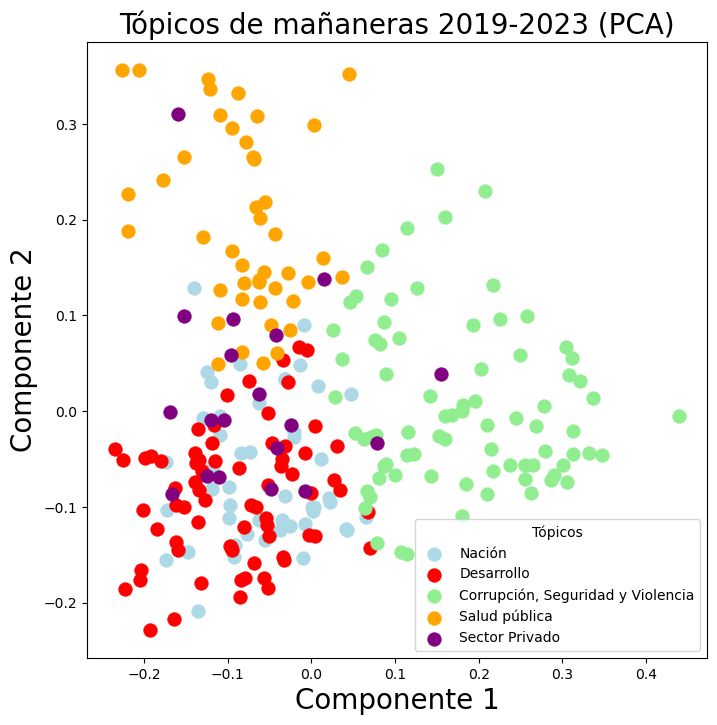

In [56]:
# Visualización con PCA con la doc_topic
PC1 = projections_PCA[:,0]
PC2 = projections_PCA[:,1]
#group = Topicos['Topico']
group = temas_mananera_NMF
target_names = ['Nación','Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (PCA)', size=20)
plt.savefig(PATH_NMF+'PCA_NMF.png',bbox_inches='tight')
plt.show()

In [57]:
transformer_NMF = KernelPCA(n_components=2, kernel='linear')
X_transformed_NMF = transformer_NMF.fit_transform(doc_topic_NMF)
X_transformed_NMF.shape

(261, 2)

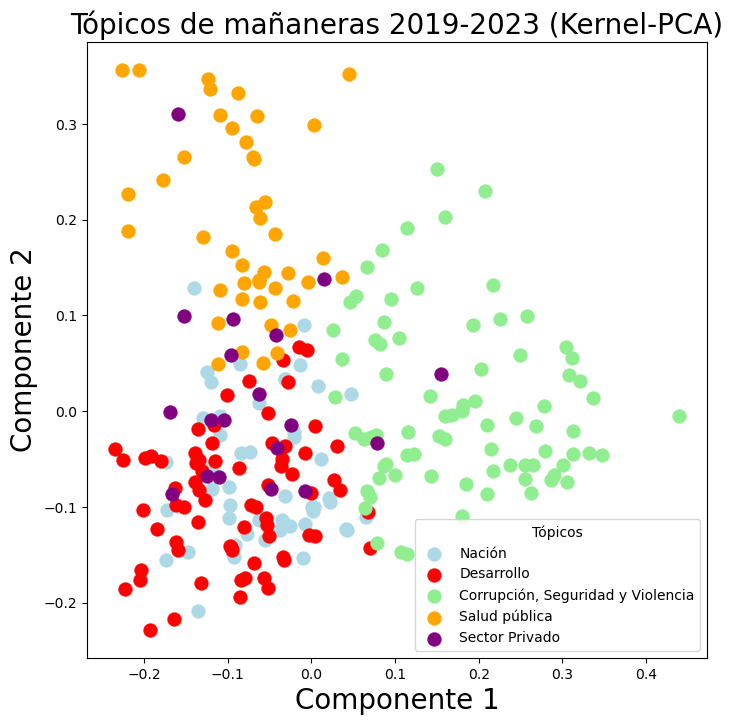

In [58]:
# Visualización con Kernel- PCA con la doc_topic
PC1 = X_transformed_NMF[:,0]
PC2 = X_transformed_NMF[:,1]
#group = Topicos_NMF['Topico']
group = temas_mananera_NMF
target_names = ['Nación','Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (Kernel-PCA)', size=20)
plt.savefig(PATH_NMF+'KernelPCA_NMF.png',bbox_inches='tight')
plt.show()

In [59]:
# Visualización t-SNE
X_embedded_NMF = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(doc_topic_NMF)
X_embedded_NMF.shape

(261, 2)

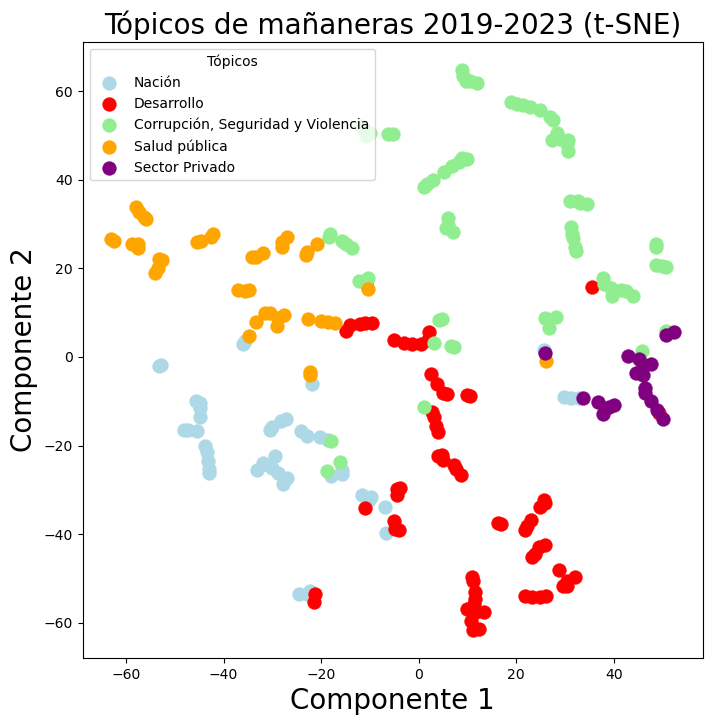

In [60]:
# Visualización con t-SNE con la doc_topic
PC1 = X_embedded_NMF[:,0]
PC2 = X_embedded_NMF[:,1]
#group = Topicos_NMF['Topico']
group = temas_mananera_NMF
target_names = ['Nación','Desarrollo', 'Corrupción, Seguridad y Violencia',
                 'Salud pública','Sector Privado']
colors = ['lightblue','red','lightgreen','orange','purple','lightyellow','lightpink']
cdict = {i:colors[i] for i in range(5)}

fig, ax = plt.subplots(figsize= (8,8))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(PC1[ix], PC2[ix],lw=0.25, c = cdict[g], label = target_names[g], s = 100)
ax.legend(title = 'Tópicos' )


plt.xlabel('Componente 1', size=20), plt.ylabel('Componente 2', size=20)
plt.title('Tópicos de mañaneras 2019-2023 (t-SNE)', size=20)
plt.savefig(PATH_NMF+'TSNE_NMF.png',bbox_inches='tight')
plt.show()

### e) Indicador semanal

Trabajaré con la matriz doc_topic_NMF. Cada renglón de esta matriz es un vector de pesos que voy a normalizar para construir un indicador entre 0 y 1. Cada peso indicaría que tanta relevancia tuvo ese tópico en esa semana particular.

#### 1) Matriz calculada con descomposición NMF

In [61]:
doc_topic_NMF

array([[0.        , 0.14169801, 0.46912803, 0.        , 0.        ],
       [0.13750679, 0.09481005, 0.40501563, 0.00793349, 0.        ],
       [0.04559804, 0.16041141, 0.34907765, 0.08038844, 0.08354227],
       ...,
       [0.28389927, 0.12337989, 0.20773496, 0.        , 0.00998248],
       [0.21117802, 0.18687525, 0.18879793, 0.03444382, 0.13447444],
       [0.28197511, 0.10608783, 0.1696207 , 0.10680542, 0.05910847]])

#### 2) Se construye el indicador y se almacena en un DataFrame

In [62]:
# Se construye el indicador con la la matriz doc_topic_NMF
indicador = np.array([
    doc_topic_NMF[i]/np.linalg.norm(doc_topic_NMF[i]) for i in range(len(doc_topic_NMF))
])

/tmp/ipykernel_171258/4021053205.py:3: RuntimeWarning: invalid value encountered in divide
  doc_topic_NMF[i]/np.linalg.norm(doc_topic_NMF[i]) for i in range(len(doc_topic_NMF))


¡¡¡¡¡¡Atención a este detalle!!!!!

In [63]:
# Los temas en la semana 108 y 109 son nulos NO ESTÁN EN LA BASE DE DATOS
# Por esta razón se marcan como nan en la parte de arriba
# SE SUSTITUYEN POR CEROS
indicador[108:110]

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [64]:
indicador[108] = np.zeros(5)
indicador[109] = np.zeros(5)

In [65]:
Serie_I = pd.DataFrame(indicador,columns=['Na','Des', 'CSyV','SP','SPriv'])

In [66]:
Serie_I['Fecha'] = index=mananeras_weekly_preprocessed.index
Serie_I

,Na,Des,CSyV,SP,SPriv,Fecha
0,0.000000,0.289144,0.957286,0.000000,0.000000,2019-01-06
1,0.313817,0.216375,0.924323,0.018106,0.000000,2019-01-13
2,0.112904,0.397190,0.864340,0.199047,0.206856,2019-01-20
3,0.054610,0.216976,0.966561,0.121796,0.029388,2019-01-27
4,0.276220,0.025808,0.946501,0.141255,0.084970,2019-02-03
...,...,...,...,...,...,...
256,0.360995,0.916700,0.142619,0.094190,0.011473,2023-12-03
257,0.305557,0.753397,0.487220,0.318819,0.000000,2023-12-10
258,0.761272,0.330842,0.557039,0.000000,0.026768,2023-12-17
259,0.575965,0.509682,0.514926,0.093942,0.366764,2023-12-24


In [67]:
S_19 = Serie_I[(Serie_I['Fecha'] <= '2019-12-31') & (Serie_I['Fecha'] >= '2019-01-01')]

In [68]:
def plot_series(Serie,year):
    fig = px.line(Serie, x="Fecha", y=Serie.columns,
              hover_data={"Fecha": "|%B %d, %Y"})
    
    fig.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")

    fig.update_layout(
        title='Relevancia de tópicos en las Mañaneras del Presidente AMLO '+year,
        xaxis_title="Fecha (semana)",
        yaxis_title="Relevancia",
        legend_title="Tópico",
        font=dict(size=15)
    )
    fig.show()

In [69]:
plot_series(S_19,'2019')

In [70]:
S_20 = Serie_I[(Serie_I['Fecha'] <= '2020-12-31') & (Serie_I['Fecha'] >= '2020-01-01')]

In [71]:
plot_series(S_20,'2020')

In [72]:
S_21 = Serie_I[(Serie_I['Fecha'] <= '2021-12-31') & (Serie_I['Fecha'] >= '2021-01-01')]

In [73]:
plot_series(S_21,'2021')

In [74]:
S_22 = Serie_I[(Serie_I['Fecha'] <= '2022-12-31') & (Serie_I['Fecha'] >= '2022-01-01')]

In [75]:
plot_series(S_22,'2022')

In [76]:
S_23 = Serie_I[(Serie_I['Fecha'] <= '2023-12-31') & (Serie_I['Fecha'] >= '2023-01-01')]

In [77]:
plot_series(S_23,'2023')

In [78]:
# Por ultimo la serie completa
plot_series(Serie_I,'(2019-2023)')